<a href="https://colab.research.google.com/github/prithvi-diwanji/NLP2024_exercises/blob/main/KNN_k_nearest_neighbour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#knn class work file of 22 may
#prithvi d

In [2]:
#use multi class data set -- UpdatedResumeDataset.csv, Sampe_resue.xt
#downlaod it from

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
#read the dataset
df=pd.read_csv('UpdatedResumeDataSet.csv')

In [5]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [6]:
#extract data using spire or any pdf reader

In [7]:
print(df['Resume'][945])

PERSONAL SKILLS â¢ Quick learner, â¢ Eagerness to learn new things, â¢ Competitive attitude, â¢ Good leadership qualities, â¢ Ability to deal with people diplomatically. PERSONAL DOSSIER Fathers Name: Dhanraj WaghEducation Details 
January 2012 to January 2016 Bachelors of Engineering Engineering Pune, Maharashtra Pune University
January 2012 Higher Secondary Certificate  Nashik, Maharashtra SND College of Engineering and Research Center
January 2010 Secondary School Certificate  Yeola, Maharashtra Swami Muktanand Jr. College
 HSC   Maharashtra State Board
 SSC   Maharashtra State Bard
 BE  Rajapur, Uttar Pradesh Madhyamik Vidya Mandir Rajapur
Testing and Quality Control Engineer 

Testing and Quality Control Engineer - M/S Rakesh Transformer Industries Pvt. Ltd
Skill Details 
Company Details 
company - M/S Rakesh Transformer Industries Pvt. Ltd
description - Responsibilities:
â¢     To conduct Routine test, Type Test (Temperature Rise Test), Special Test on Transformers as per I

In [8]:
#predict new resume is sutiable for which job profile???

Separate input and output data

In [9]:
x=df['Resume']
y=df['Category']

In [11]:
#how many job profiles are present?
set(y)

{'Advocate',
 'Arts',
 'Automation Testing',
 'Blockchain',
 'Business Analyst',
 'Civil Engineer',
 'Data Science',
 'Database',
 'DevOps Engineer',
 'DotNet Developer',
 'ETL Developer',
 'Electrical Engineering',
 'HR',
 'Hadoop',
 'Health and fitness',
 'Java Developer',
 'Mechanical Engineer',
 'Network Security Engineer',
 'Operations Manager',
 'PMO',
 'Python Developer',
 'SAP Developer',
 'Sales',
 'Testing',
 'Web Designing'}

In [14]:
len(set(y))

25

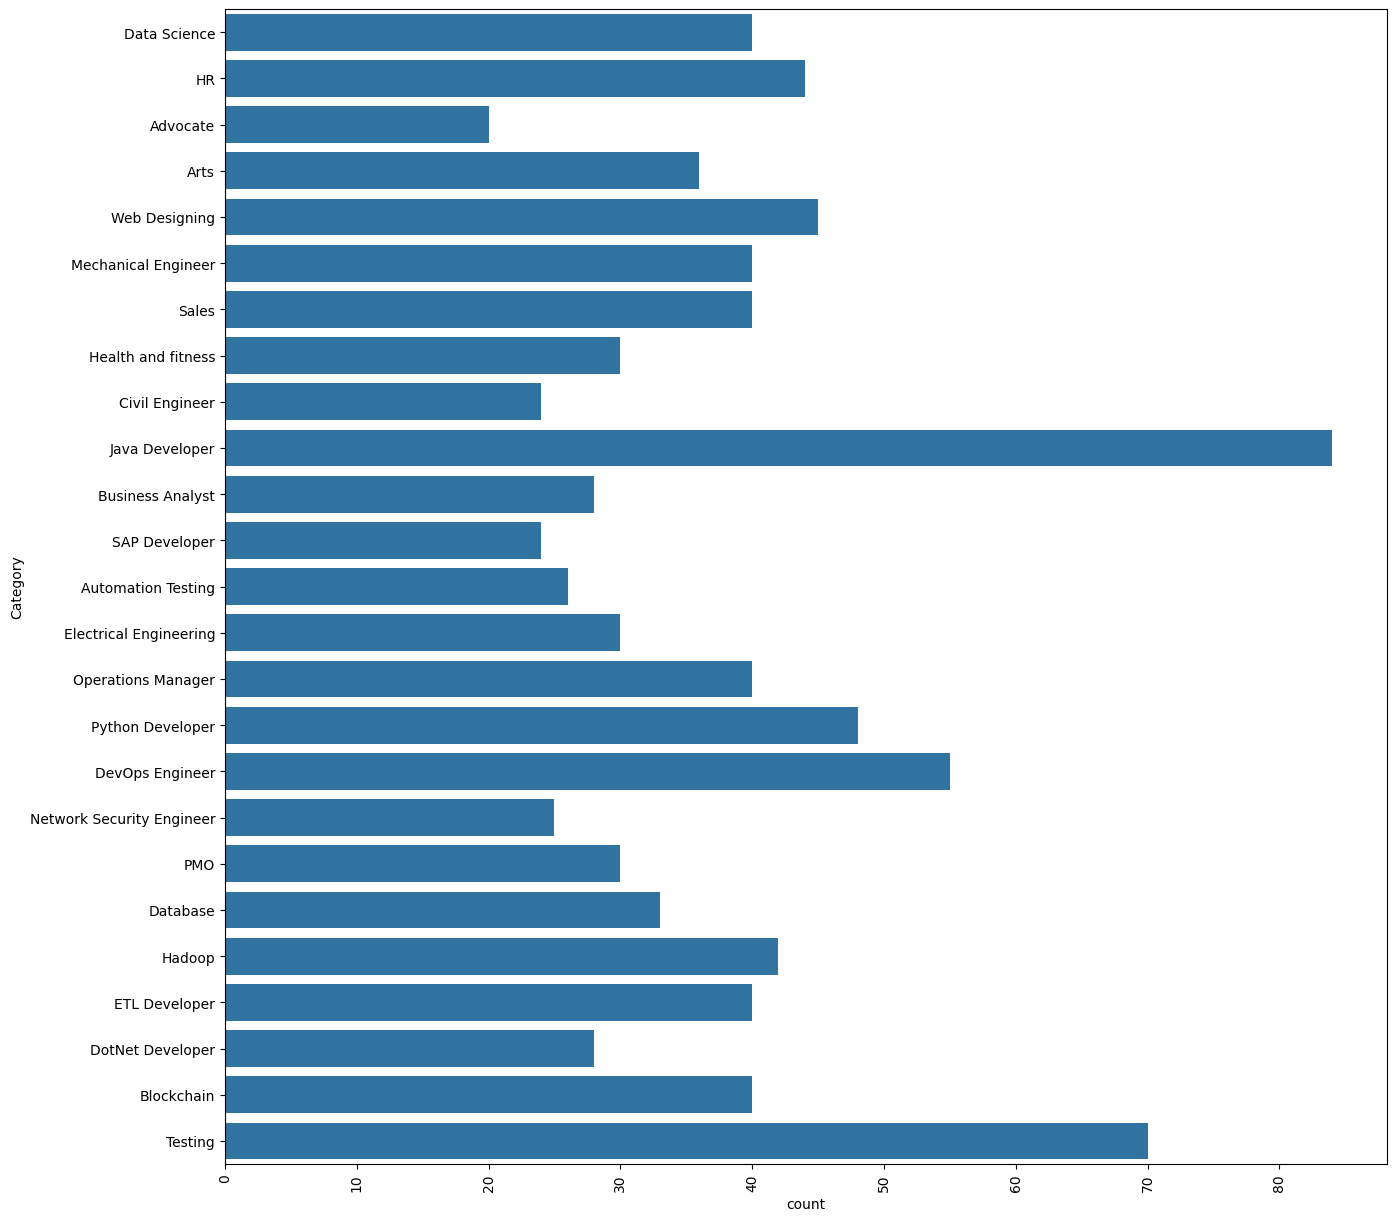

In [15]:
#explore the data
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y=df['Category']);

In [16]:
y.value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [17]:
#convert to piechart from

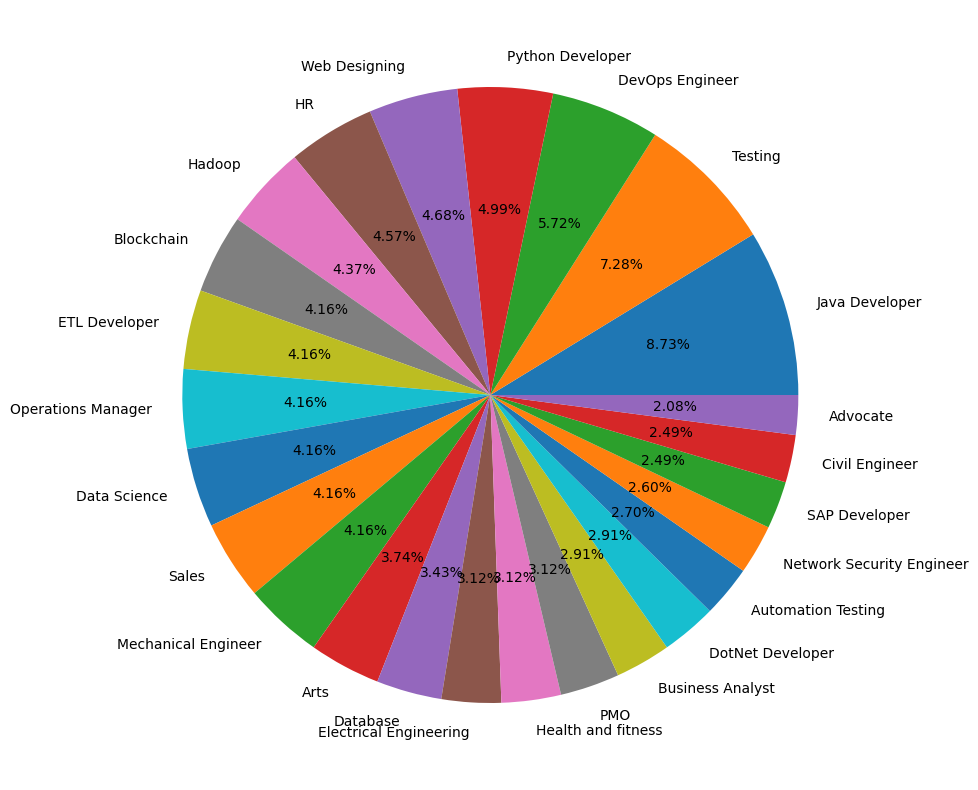

In [20]:
#plt.figure(figsize=(10.10))
#plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%');
plt.figure(figsize=(10,10))
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%');

In [21]:
#step  - for cleaning hte text like stemming stopwords, etc
#here we will apply anohter technique - substiture method usin regular expressions

Clean using regular expressions - substitute



In [ ]:
#remove hyperlinks, re-tweets, hashtags, mentions@, from the text
#remove punctuation marks and replace with space, onlu consider unicode text that is english letters
#extra spaces are removed


data preparation and cleaning

In [22]:
import re, string

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
#use sub method

In [26]:
def cleanResume (resumeText):
  resumeText = re.sub('http\S+\s*', ' ', resumeText) #remove URLS
  resumeText = re.sub('RT|cc', ' ', resumeText) #remove rt adn cc
  resumeText = re.sub('#|S+', ' ', resumeText) #remove hashtags
  resumeText = re.sub('@|S+', ' ', resumeText) #remove mentions
  resumeText = re.sub('[%s]' % re.escape(string.punctuation), ' ', resumeText) #remove punctuation
  resumeText = re.sub(r'[^\x00-\x7f, r',' ', resumeText) #remove unicode chars
  resumeText = re.sub('\s', ' ', resumeText) #remove whitespace
  return resumeText
